<a href="https://colab.research.google.com/github/anandlo/Diamond-Prediction-using-Snowflake-and-Snowpark-ML/blob/main/Snowpark_ML_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade snowflake-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
import getpass
pwd = getpass.getpass ("Enter password:")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Enter password:··········


In [ ]:
!pip install snowflake-snowpark-python
!pip install snowflake-ml-python
# Installs the snowflake snowpark module
from snowflake.snowpark.version import VERSION
import snowflake. snowpark.functions as F
from snowflake.snowpark.types import DecimalType
# Snowpark ML
import snowflake.ml.modeling.preprocessing as snowml
from snowflake.ml.modeling.pipeline import Pipeline
from snowflake.snowpark.session import Session

# Misc
import joblib
# warning suppresion
import warnings; warnings.simplefilter('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
  Attempting uninstall: fsspec
    Found existing i

In [ ]:
from snowflake.snowpark.session import Session

# Create a connection dictionary for Snowflake
connection_parameters = {'user':'AnandLo','password':str(pwd),'account':'dz82165.ca-central-1.aws', }
# Establish the session
session = Session.builder.configs(connection_parameters).create()

# Now, use the session in your Snowpark workflow


In [ ]:
import snowflake.connector
conn = snowflake.connector.connect(user='AnandLo',password=str(pwd),account='dz82165.ca-central-1.aws')

In [ ]:
sql = "select * from DIAMONDS.PUBLIC.DIAMONDS"

In [ ]:
df = pd.read_sql(sql, conn)
print(df)

       CARAT COLOR CLARITY  TABLE_PCT  PRICE     X     Y     Z        CUT  \
0       0.23     E     SI2       55.0    326  3.95  3.98  2.43      IDEAL   
1       0.21     E     SI1       61.0    326  3.89  3.84  2.31    PREMIUM   
2       0.23     E     VS1       65.0    327  4.05  4.07  2.31       GOOD   
3       0.29     I     VS2       58.0    334  4.20  4.23  2.63    PREMIUM   
4       0.31     J     SI2       58.0    335  4.34  4.35  2.75       GOOD   
...      ...   ...     ...        ...    ...   ...   ...   ...        ...   
53915   0.72     D     SI1       57.0   2757  5.75  5.76  3.50      IDEAL   
53916   0.72     D     SI1       55.0   2757  5.69  5.75  3.61       GOOD   
53917   0.70     D     SI1       60.0   2757  5.66  5.68  3.56  VERY_GOOD   
53918   0.86     H     SI2       58.0   2757  6.15  6.12  3.74    PREMIUM   
53919   0.75     D     SI2       55.0   2757  5.83  5.87  3.64      IDEAL   

       DEPTH  
0       61.5  
1       59.8  
2       56.9  
3       62.4  


In [ ]:
df.describe()

,CARAT,TABLE_PCT,PRICE,X,Y,Z,DEPTH
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,57.456834,3930.993231,5.731627,5.734887,3.540046,61.749514
std,0.473795,2.234064,3987.280446,1.119423,1.140126,0.702530,1.432331
min,0.200000,43.000000,326.000000,3.730000,3.680000,1.070000,43.000000
25%,0.400000,56.000000,949.000000,4.710000,4.720000,2.910000,61.000000
50%,0.700000,57.000000,2401.000000,5.700000,5.710000,3.530000,61.800000
75%,1.040000,59.000000,5323.250000,6.540000,6.540000,4.040000,62.500000
max,5.010000,95.000000,18823.000000,10.740000,58.900000,31.800000,79.000000


In [ ]:
categories = {
    'CUT': np.array(['FAIR', 'GOOD', 'VERY_GOOD', 'PREMIUM', 'IDEAL']),
    'COLOR': np.array(['J', 'I', 'H', 'G', 'F', 'E', 'D']),
    'CLARITY':np.array(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
}
snowml_oe = snowml.OrdinalEncoder(input_cols=['CUT', 'COLOR', 'CLARITY'], output_cols=['cut_oe', 'color_oe', 'clarity_oe'], categories=categories)

ord_encoded_diamonds_df = snowml_oe.fit(df).transform(df)
print(snowml_oe._state_pandas)



   _COLUMN_NAME  _CATEGORY  _INDEX
0       CLARITY         I1     0.0
1       CLARITY         IF     1.0
2       CLARITY        SI1     2.0
3       CLARITY        SI2     3.0
4       CLARITY        VS1     4.0
5       CLARITY        VS2     5.0
6       CLARITY       VVS1     6.0
7       CLARITY       VVS2     7.0
8         COLOR          D     0.0
9         COLOR          E     1.0
10        COLOR          F     2.0
11        COLOR          G     3.0
12        COLOR          H     4.0
13        COLOR          I     5.0
14        COLOR          J     6.0
15          CUT       FAIR     0.0
16          CUT       GOOD     1.0
17          CUT      IDEAL     2.0
18          CUT    PREMIUM     3.0
19          CUT  VERY_GOOD     4.0


In [ ]:
print(ord_encoded_diamonds_df.head(10))

   CARAT COLOR CLARITY  TABLE_PCT  PRICE     X     Y     Z        CUT  DEPTH  \
0   0.23     E     SI2       55.0    326  3.95  3.98  2.43      IDEAL   61.5   
1   0.21     E     SI1       61.0    326  3.89  3.84  2.31    PREMIUM   59.8   
2   0.23     E     VS1       65.0    327  4.05  4.07  2.31       GOOD   56.9   
3   0.29     I     VS2       58.0    334  4.20  4.23  2.63    PREMIUM   62.4   
4   0.31     J     SI2       58.0    335  4.34  4.35  2.75       GOOD   63.3   
5   0.24     J    VVS2       57.0    336  3.94  3.96  2.48  VERY_GOOD   62.8   
6   0.24     I    VVS1       57.0    336  3.95  3.98  2.47  VERY_GOOD   62.3   
7   0.26     H     SI1       55.0    337  4.07  4.11  2.53  VERY_GOOD   61.9   
8   0.22     E     VS2       61.0    337  3.87  3.78  2.49       FAIR   65.1   
9   0.23     H     VS1       61.0    338  4.00  4.05  2.39  VERY_GOOD   59.4   

   cut_oe  color_oe  clarity_oe  
0     4.0       5.0         1.0  
1     3.0       5.0         2.0  
2     1.0       5

In [ ]:
CATEGORICAL_COLUMNS = ['CUT', 'COLOR', 'CLARITY']
CATEGORICAL_COLUMNS_OE = ['CUT_OE', 'COLOR_OE', 'CLARITY_OE']

categories = {
    'CUT': np.array(['FAIR', 'GOOD', 'VERY_GOOD', 'PREMIUM', 'IDEAL']),
    'COLOR': np.array(['J', 'I', 'H', 'G', 'F', 'E', 'D']),
    'CLARITY':np.array(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
}

In [ ]:
Preprocessing_pipeline = Pipeline(
    steps=[
        ('OE',
          snowml.OrdinalEncoder(
            input_cols=CATEGORICAL_COLUMNS,
            output_cols=CATEGORICAL_COLUMNS_OE,
            categories=categories
          )
        )
    ]
)
Pipeline_file = 'Preprocessing_pipeline.joblib'
joblib.dump(Preprocessing_pipeline, Pipeline_file)

['Preprocessing_pipeline.joblib']

In [ ]:
session.use_database("DIAMONDS")
session.use_schema("PUBLIC")
session.file.put(Pipeline_file, 'ML_file', overwrite=True)

[PutResult(source='Preprocessing_pipeline.joblib', target='Preprocessing_pipeline.joblib.gz', source_size=1704, target_size=976, source_compression='NONE', target_compression='GZIP', status='UPLOADED', message='')]

In [ ]:
from snowflake.ml.modeling.xgboost import XGBRegressor
import joblib

In [ ]:
Preprocessing_pipeline.to_sklearn()

Pipeline(steps=[('OE',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OE',
                                                  OrdinalEncoder(categories=[array(['FAIR', 'GOOD', 'VERY_GOOD', 'PREMIUM', 'IDEAL'], dtype='<U9'),
                                                                             array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype='<U1'),
                                                                             array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
      dtype='<U4')]),
                                                  ['CUT', 'COLOR',
                                                   'CLARITY'])]))])

In [ ]:
CATEGORICAL_COLUMNS_OE = ['CUT_OE', 'COLOR_OE', 'CLARITY_OE']
CATEGORICAL_COLUMNS = ['CUT', 'COLOR', 'CLARITY']
NUMERICAL_COLUMNS = ['CARAT', 'TABLE_PCT', 'DEPTH', 'X', 'Y', 'Z']

LABEL_COLUMNS = ['PRICE']
OUTPUT_COLUMNS = ['PREDICTED_PRICE']

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.1, random_state=0)
train_df = Preprocessing_pipeline.fit(df_train).transform(df_train)
test_df = Preprocessing_pipeline.transform(df_test)

In [ ]:
regressor = XGBRegressor(
    input_cols=NUMERICAL_COLUMNS + CATEGORICAL_COLUMNS_OE,
    label_cols=LABEL_COLUMNS,
    output_cols=OUTPUT_COLUMNS,
)

regressor.fit(train_df)
result = regressor.predict(test_df)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'result' contains the predicted values and 'test_df' contains the actual values
y_true = test_df['PRICE']
y_pred = result['PREDICTED_PRICE']

r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")


R2 Score: 0.982924809760296
Mean Squared Error: 268414.4539135129


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_regressor = LinearRegression()

# Train the model using the training data
linear_regressor.fit(train_df[NUMERICAL_COLUMNS + CATEGORICAL_COLUMNS_OE], train_df['PRICE'])

# Make predictions on the test data
linear_predictions = linear_regressor.predict(test_df[NUMERICAL_COLUMNS + CATEGORICAL_COLUMNS_OE])

# Evaluate the model
linear_r2 = r2_score(test_df['PRICE'], linear_predictions)
linear_mse = mean_squared_error(test_df['PRICE'], linear_predictions)

print(f"Linear Regression R2 Score: {linear_r2}")
print(f"Linear Regression Mean Squared Error: {linear_mse}")


Linear Regression R2 Score: 0.9063541534209072
Linear Regression Mean Squared Error: 1472071.3747802672


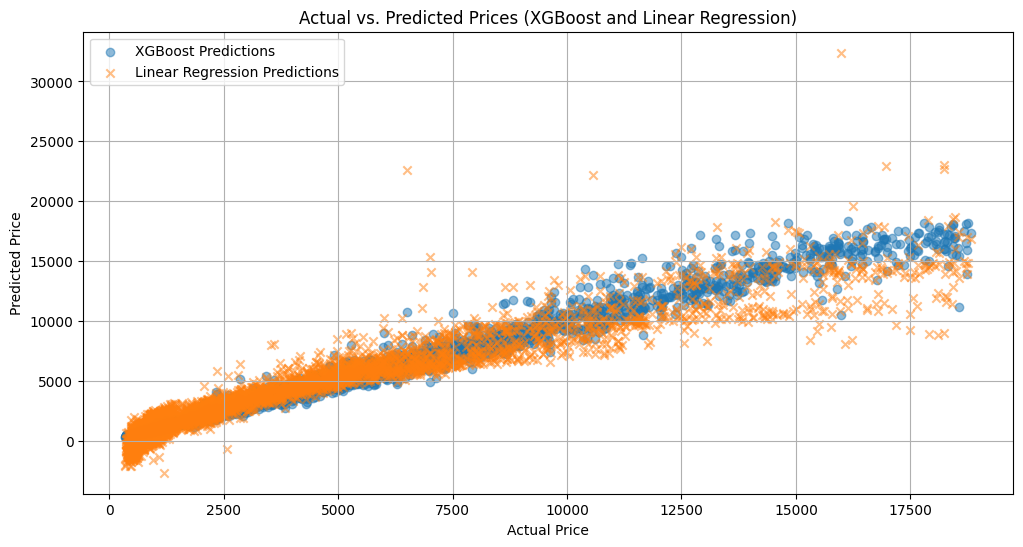

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.scatter(test_df['PRICE'], y_pred, label='XGBoost Predictions', alpha=0.5)
plt.scatter(test_df['PRICE'], linear_predictions, label='Linear Regression Predictions', alpha=0.5, marker='x')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (XGBoost and Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from snowflake.ml.modeling.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning

grid_search = GridSearchCV(
    estimator=regressor,
    param_grid={
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2, 0.4, 0.5],  # Wider range
        'max_depth': [3, 7],  # Add max_depth as a hyperparameter
        'gamma': [0, 0.2, 0.5],  # Wider range
    },
    n_jobs = -1,
    scoring = 'r2',
    cv=5,
    input_cols=NUMERICAL_COLUMNS + CATEGORICAL_COLUMNS_OE,
    label_cols=LABEL_COLUMNS,
    output_cols=OUTPUT_COLUMNS,
)

grid_search.fit(train_df)

In [ ]:
grid_search.to_sklearn().best_params_

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

Hyper-tuned XGBoost R2 Score: 0.9836262541473246
Hyper-tuned XGBoost Mean Squared Error: 257388.05775324002
Initial XGBoost R2 Score: 0.982924809760296
Initial XGBoost Mean Squared Error: 268414.4539135129


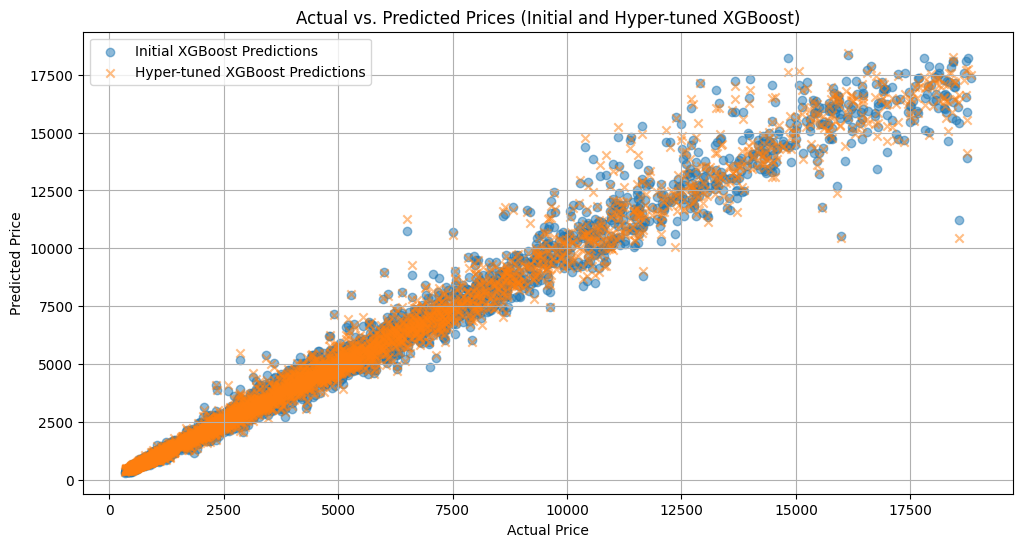

In [ ]:
best_params = grid_search.to_sklearn().best_params_

# Create a new XGBRegressor with the best parameters
best_regressor = XGBRegressor(
    input_cols=NUMERICAL_COLUMNS + CATEGORICAL_COLUMNS_OE,
    label_cols=LABEL_COLUMNS,
    output_cols=OUTPUT_COLUMNS,
    **best_params
)

# Fit the best regressor to the training data
best_regressor.fit(train_df)

# Predict using the best regressor
best_predictions = best_regressor.predict(test_df)['PREDICTED_PRICE']

# Evaluate the best regressor
best_r2 = r2_score(test_df['PRICE'], best_predictions)
best_mse = mean_squared_error(test_df['PRICE'], best_predictions)

print(f"Hyper-tuned XGBoost R2 Score: {best_r2}")
print(f"Hyper-tuned XGBoost Mean Squared Error: {best_mse}")

# Compare with the initial XGBoost model
print(f"Initial XGBoost R2 Score: {r2}")
print(f"Initial XGBoost Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(test_df['PRICE'], y_pred, label='Initial XGBoost Predictions', alpha=0.5)
plt.scatter(test_df['PRICE'], best_predictions, label='Hyper-tuned XGBoost Predictions', alpha=0.5, marker='x')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Initial and Hyper-tuned XGBoost)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from snowflake.ml.modeling.preprocessing import OrdinalEncoder


In [ ]:
snowpark_df = session.create_dataframe(df)

In [ ]:
CATEGORICAL_COLUMNS = ['CUT', 'COLOR', 'CLARITY']
CATEGORICAL_COLUMNS_OE = ['CUT_OE', 'COLOR_OE', 'CLARITY_OE']
NUMERICAL_COLUMNS = ['CARAT', 'TABLE_PCT', 'DEPTH', 'X', 'Y', 'Z']

Categories = {
    'CUT': np.array(['FAIR', 'GOOD', 'VERY_GOOD', 'PREMIUM', 'IDEAL']),
    'COLOR': np.array(['J', 'I', 'H', 'G', 'F', 'E', 'D']),
    'CLARITY':np.array(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
}

pipe = Pipeline(
    steps=[
        ('OE',
          OrdinalEncoder(
            input_cols=CATEGORICAL_COLUMNS,
            output_cols=CATEGORICAL_COLUMNS_OE,
            categories=Categories,
            drop_input_cols=True)
        ),
        ("regressor", XGBRegressor(
            learning_rate=0.1,
            n_estimators=100,
            max_depth=7,
            gamma=0,
            input_cols=NUMERICAL_COLUMNS + CATEGORICAL_COLUMNS_OE,
            label_cols=['PRICE'],
            output_cols=['PREDICTED_PRICE'],
            n_jobs=-1)
        )
    ]
        )

diamonds_train_df, diamonds_test_df = snowpark_df.random_split(weights=[0.9,0.1], seed=0)
xgb_optimal_model = pipe.fit(diamonds_train_df).to_sklearn()



In [ ]:
from sklearn import set_config
set_config(display='diagram')
xgb_optimal_model

Pipeline(steps=[('OE',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OE',
                                                  OrdinalEncoder(categories=[array(['FAIR', 'GOOD', 'VERY_GOOD', 'PREMIUM', 'IDEAL'], dtype='<U9'),
                                                                             array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype='<U1'),
                                                                             array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
      dtype='<U4')]),
                                                  [7, 1, 2])])),
                ('filter_input_cols_for_estimator',
                 ColumnT...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
MODEL_FILE = 'xgb_optimal_pipe.joblib'
joblib.dump(xgb_optimal_model, MODEL_FILE)
session.file.put(MODEL_FILE, '@ML_FILE', overwrite=True, auto_compress=False)
from snowflake.snowpark.functions import udf

In [ ]:
import joblib
import sys
import os
import cachetools
from snowflake.snowpark import functions as F
from snowflake.snowpark.types import PandasDataFrame, PandasSeries
import snowflake.snowpark as T

# Define a function to read the model from a file
@cachetools.cached(cache={})
def read_file(filename):
    IMPORT_DIRECTORY_NAME = "snowflake_import_directory"
    import_dir = sys._xoptions[IMPORT_DIRECTORY_NAME]

    if import_dir:
        with open(os.path.join(import_dir, filename), 'rb') as file:
            model = joblib.load(file)
            return model
    else:
        raise RuntimeError(f"Import directory not found for: {IMPORT_DIRECTORY_NAME}")

# Create a vectorized UDF for batch inference
@F.udf(
    name="predict_diamond_price",
    is_permanent=True,
    stage_location="@ML_FILE",
    imports=["@ML_FILE/xgb_optimal_pipe.joblib"],
    packages=[
        'snowflake-ml-python',
        'joblib',
        'scikit-learn',
        'xgboost',
        'cachetools'
    ],
    replace=True,
    session=session
)

def predict_diamond_price(pd_input: PandasDataFrame[ float, str, str, float, float, float, float, str, float]) -> PandasSeries[float]:
    # Ensure the DataFrame has the expected columns
    features = ["CARAT", "COLOR", "CLARITY", "TABLE_PCT", "X", "Y", "Z", "CUT", "DEPTH"]
    pd_input.columns = features

    # Load the model
    model = read_file('xgb_optimal_pipe.joblib')

    # Make predictions
    predictions = model.predict(pd_input)
    return predictions


In [ ]:
new_diamonds = session.table('DIAMONDS_NEW')

# Use array_construct to pass the columns as a DataFrame to the UDF
new_diamonds_w_prediction = new_diamonds.with_column(
    'PREDICTED_PRICE',
    F.call_function('predict_diamond_price',
            F.col('CARAT'), F.col('COLOR'), F.col('CLARITY'),
           F.col('TABLE_PCT'), F.col('X'), F.col('Y'), F.col('Z'), F.col('CUT'), F.col('DEPTH')
        )
    )

In [ ]:
new_diamonds_w_prediction.show()

--------------------------------------------------------------------------------------------------------------
|"CARAT"  |"COLOR"  |"CLARITY"  |"TABLE_PCT"  |"X"   |"Y"   |"Z"   |"CUT"      |"DEPTH"  |"PREDICTED_PRICE"  |
--------------------------------------------------------------------------------------------------------------
|1.23     |H        |SI2        |57           |6.98  |6.94  |4.22  |IDEAL      |60.6     |5608.3349609375    |
|1.22     |E        |VVS1       |60           |6.87  |6.85  |4.19  |PREMIUM    |61.1     |13668.5771484375   |
|1.28     |J        |SI1        |56           |7.13  |7.00  |4.37  |PREMIUM    |61.9     |5293.0400390625    |
|0.24     |E        |VVS1       |58           |4.03  |4.01  |2.44  |PREMIUM    |60.7     |638.5242919921875  |
|1.01     |H        |VS1        |57           |6.47  |6.38  |3.96  |PREMIUM    |61.6     |5232.71630859375   |
|0.33     |I        |SI1        |59           |4.50  |4.54  |2.73  |PREMIUM    |60.4     |497.60400390625    |
|

In [ ]:
new_diamonds_w_prediction.write.mode('overwrite').save_as_table('DIAMONDS_PREDICTIONS')